https://jovian.ai/aakashns/05-cifar10-cnn 

## Download cifar10 data and sort them out

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

```download_url(url, 'data')``` : 
* download the file that I get from the url and put it in the folder ```'data'``` in our directory. 
* If we put ```'.'``` instead of ```'data'```, then it means that we are installing that directly on the directory. But we need a ```.``` before ```data```.
* Since ```.``` means the current directory (or root directory), ```data``` can be replaced with ```./data```.

```tarfile.open('data/cifar10.tgz', 'r:gz') as tar:  tar.extractall(path='data')``` :
* ```tarfile.open('data/cifar10.tgz', 'r:gz') as tar:``` : designate the ```.tgz``` file.
* ```tar.extractall(path='data')``` : save the extracted file in ```'data'```.

In [2]:
# dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
# # download_url(dataset_url, 'data')
# # download_url(dataset_url, '.')
# download_url(dataset_url, './data')

# with tarfile.open('./data/cifar10.tgz', 'r:gz') as tar:
#     tar.extractall(path='./data')

https://www.tutorialsteacher.com/python/os-module Regarding package ```os``` that deals with managing directories.
* ```os.getcwd()``` : get the current directory. corresponds to getwd() in R.
* ```os.chdir("C:\MyPythonProject")``` : change the working directory. corresponds to setwd() in R.
* ```os.listdir()``` : list all the objects (files, directories, etc.) in the given directory.

In [3]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
airplane_train_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_train_files))
ship_test_files = os.listdir(data_dir + "/test/ship")
print('No. of test examples for airplanes:', len(ship_test_files))

No. of training examples for airplanes: 5000
No. of test examples for airplanes: 1000


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())
dataset

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: ToTensor()

Each image has the shape of 3 $\times$ 32 $\times$ 32 (RGB and 32 $\times$ 32 pixel size). Label is 0 to 9, each representing from airplane to truck.

In [7]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


We may check the classes and their corresponding indices by ```dataset.classes``` and ```dataset.class_to_idx```. We may wonder which attributes each instance (or class) has. We can check this by ```dataset.__dict__```.

In [8]:
print(dataset.classes)
print(dataset.class_to_idx)
# dataset.__dict__

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## Show individual image

In [9]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'



Label:  airplane (0)


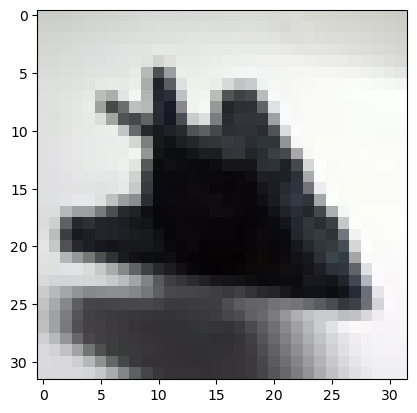

In [10]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    
show_example(*dataset[0])
# show_example(dataset[0][0], dataset[0][1])
# plt.imshow(dataset[0][0].permute(1, 2, 0))

Let us assume that ```function(x1,x2)``` takes 2 inputs (not necessarily two), and we have a tuple ```xtuple = (x1,x2)```. Then we can run ```function(*xtuple)``` instead of ```function(x1, x2)```. In other words ```*``` is spreading the tuple into separate elements when using it as the input of a function.

In [11]:
def add2(x1, x2):
    return x1 + x2
print(add2(*(1,2)))

def add3(x1, x2, x3):
    return x1 + x2 + x3
print(add3(*(1,2,4)))

3
7


## Showing the images

In [12]:
random_seed = 42
torch.manual_seed(random_seed)

In [13]:
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

* For validation datasets, they double the batch size, probably in order to speed up the computations. At least theoretically (if not for numerical issues), the evaluated accuracy (or losses) on the validation set should stay the same, because we are anyway going to use all images in the validation dataset whenever the model gets updated using all training data.

In [14]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size * 2, num_workers=4, pin_memory=True)

* ```_, ax = plt.subplots(figsize=(12,6))``` : 12 $\times$ 6 is the size of the pane. This is different from ```plt.subplot```.
* ```ax.set_xticks([]); ax.set_yticks([])``` : Remove the labels and ticks in x and y axis.
* ```make_grid(images, nrow=16)``` : returns [3, 274, 546]-sized tensor. ```nrow=16``` means that the number of images displayed in each row is 16, or equavalently 16 columns.
* ```.permute(1,2,0)``` : switches the tensor dimension. The former dim=1 comes to dim=0, former dim=2 comes to dim=1, and former dim=0 comes to dim=2. When applied to our image tensor, the RGB dimension goes to the last (dim=2).

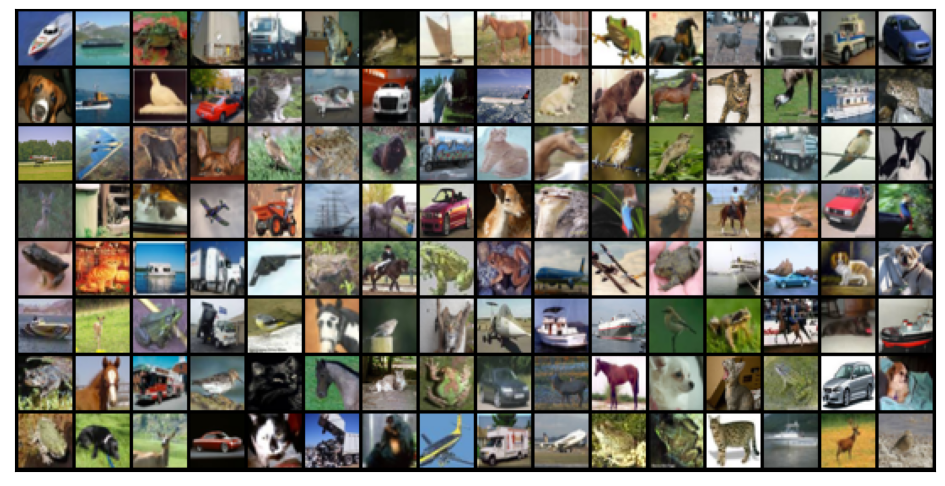

In [15]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
        break

show_batch(train_dl)

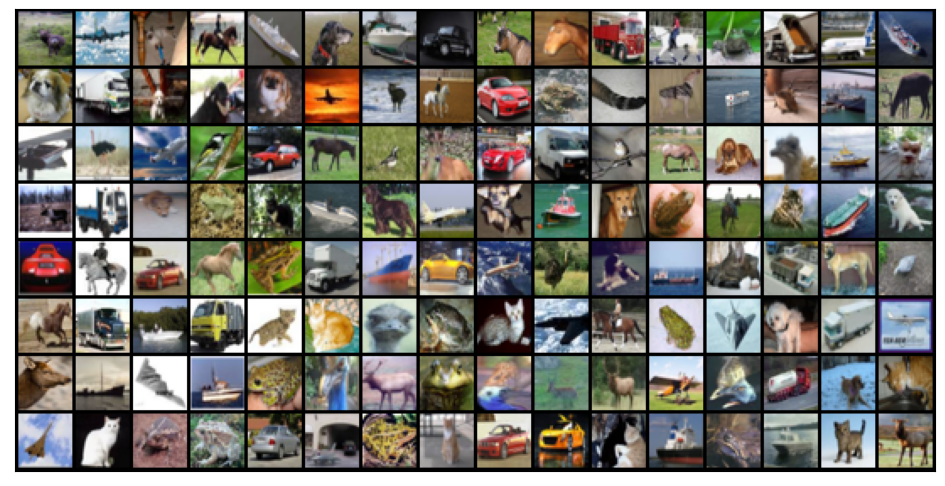

In [16]:
for images, labels in train_dl:
        _, ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
        break

## kernel matrix

In [17]:
def apply_kernel(image, kernel):
    ri, ci = image.shape # number of rows & columns of image
    rk, ck = kernel.shape # number of rows & columns of kernel matrix
    ro, co = ri-rk+1, ci-ck+1 # number of rows & columns of output
    output = torch.zeros([ro, co])
    for i in range(ro):
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
    return output

In [18]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

## nn.Sequential

* Channels can be viewed as number of features. Color (RGB) can also be viewed as a feature too. https://www.youtube.com/watch?v=3myNsOGhc3A
* The kernel matrix (which represents the feature: horizontal line, vertical line, curvature, etc.) are not fixed. Although we can let it be fixed, the entries inside the kernel matrix also get updated through backpropagation. In fact, the entries in the kernel are the weights that we update, and there is also a bias term that remains to be updated. So it is pretty common-sense that we update the kernel, although it may sound counter-intuitive that the features that we are detecting changes as iteration proceeds.
* ```nn.Conv2d``` convolutes in a matrix-wise manner. However of course all the input channels (whether it is RGB or other features) all affect every output channel by linear combination. For instance, when input has 3 channels (RGB) and the output channel has 8 features (shapes), all RGB matrices are convoluted in computing the output matrices. This is shown in the formula that shows up in the very first part. https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
* ```nn.MaxPool2d``` is applied for each matrix (in each channel), and obtains the maximum element in each submatrix. Since each maximizing procedure is applied to each matrix (in each channel) separately, the number of channels is preserved.

Let us assume that there are $C_{in}$ channels for input and $C_{out}$ channels for output. Ignoring the effect of padidng, striding, dilating, etc., assume that $i-th$ input matrix and $j-th$ output matrix ($i=1,\cdots,C_{in}$ and $j=1,\cdots, C_{out}$ are the channel indices of input and output.) are of the size $input_i \in \mathbb{R}^{p \times p}$ and $output_j \in \mathbb{R}^{q\times q}$. (For now, we ingnore the observation index.) Then we have the following formula

\begin{align}
output_j = bias_j + \sum_{i=1}^{C_{in}} weight_j * input_i \ \ \ (j=1,\cdots, C_{out}),
\end{align}

where $*$ represents the convolution procedure. Note that $weight_j$ and $bias_j$ correspond to the output index, and we are adding up all the convolution results from every $input_i$'s. The $bias_j$'s and $weight_j$'s are the parameters that we are updating through backpropagation, and the $weight_j \in \mathbb{R}^{k\times k}$ represents teh $k\times k$ kernel matrix that we convolute the input matrix with. 

In [19]:
import torch.nn as nn
import torch.nn.functional as F

```nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)``` : 
* 3 channels (RGB) $\rightarrow$ 8 channels (features)
* With this kernel_size, stride, padding, and dilation=1 (default), the size is maintained.

```nn.MaxPool2d(2,2)```:
* Default value of stride is kernel_size. So this shrinks both height and width into half sizes.

```nn.Flatten()```:
* flattens a $(P)$-dimensional tensor $N \times d_1 \times d_2 \times \cdots \times d_{P-1}$ tensor into $N \times (\prod_{p=1}^{P-1} d_p )$ matrix. The first dimension $N$ usually means the batch size.

```nn.Linear(input_p, output_q)```:
* The variables are number of variables of input and output data. It builds a model: $\mathbb{R}^{N\times p} \rightarrow \mathbb{R}^{N\times q}$ whose outputs are both 2-dim arrays (matrices).

In [20]:
input = torch.randn(32, 1, 5, 5)
m = nn.Flatten()
output = m(input)
output.size()

torch.Size([32, 25])

In [21]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [22]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


* When defining ```ImageClassificationBase```, even if we are inheriting from ```nn.Module```, we are not putting ```def __init__()``` nor ```super().__init__()```. This is because we are not making a model based on ```ImageClassificationBase```. Instead, we are making another class ```Cifar10CnnModel(ImageClassificationBase)``` and making a model based on this. This means that it suffices for us to code ```def __init__()``` nor ```super().__init__()``` once.

In [23]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

* Through ```nn.Conv2d```, the size of the matrices does not change. Only the number of channels (features) changes. 
* Only by ```nn.MaxPool2d```, we shrink the size of matrices into half and half.
* By ```nn.Flatten()```, we are flattening the 3-array tensor into an 1-array tensor (equivalent to a vector).

In [24]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential( # input: bs x 3 x 32 x 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 256 x 4 x 4

            nn.Flatten(),  # output: bs x (256 x 4 x 4) : no longer three-array tensor.
            nn.Linear(256*4*4, 1024), # output: bs x 1024
            nn.ReLU(),
            nn.Linear(1024, 512), # output: bs x 512
            nn.ReLU(),
            nn.Linear(512, 10)) # output: bs x 10
        
    def forward(self, xb):
        return self.network(xb)

In [25]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [26]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0121, -0.0116,  0.0061,  0.0147, -0.0052,  0.0176,  0.0185, -0.0455,
        -0.0534,  0.0269], grad_fn=<SelectBackward0>)


## Convert into cuda

In [27]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [28]:
device = get_default_device()
device

device(type='cpu')

In [29]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
# to_device(model, device)

## Train the model

* https://pytorch.org/docs/stable/optim.html It is recommended that we convert the model into cuda prior to running ```optimizer = opt_func(model.parameters(), lr)```. (As a matter of fact, I made ```optimizer``` before converting the model into cuda, and stil worked fine. But anyway it is not recommended to do so.)

In [30]:
# @torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
model = to_device(Cifar10CnnModel(), device)
evaluate(model, val_dl)

{'val_loss': 2.30259108543396, 'val_acc': 0.10006892681121826}

There are multiple choices other than SGD in ```torch.optim```, as listed here https://pytorch.org/docs/stable/optim.html. I summarized the development of the following methodologies in p.46-2 of the note <Newly Known Facts 3>.
* ```SGD``` can use ```momentum``` to avoid oscillations by reflecting history.
* ```AdaGrad``` narrows down the gradient step as iteration proceeds, making it feasible to approach the minimum precisely. However there is a danger that we get extremely small gradient steps. 
* ```RMSProp``` prevents the gradient step from getting too small.
* ```Adam``` corrects the bias that appears when approximating $\mathbb{E}(g_t^2)$.

In [32]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [33]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.8017, val_loss: 1.3903, val_acc: 0.4858
Epoch [1], train_loss: 1.2474, val_loss: 1.1713, val_acc: 0.5888
Epoch [2], train_loss: 0.9789, val_loss: 0.9561, val_acc: 0.6601


* Overfitting: Loss in training data keeps on decreasing, but that in validation data even increases. One solution to avoid this is to stop when validation loss begins increasing.

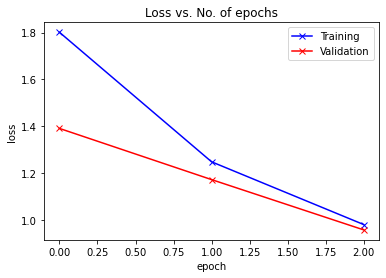

In [34]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history)    

## Test data

In [35]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [36]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane
Label: automobile , Predicted: automobile


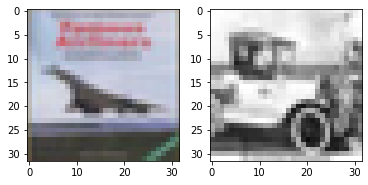

In [37]:
plt.subplot(1,2,1)
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

plt.subplot(1,2,2)
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [38]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.9613540768623352, 'val_acc': 0.655957043170929}

## Save and Load the Model

In [ ]:
torch.save(model.state_dict(), 'data/cifar10-cnn.pth')
%reset

* Import all the necessary libraries and functions in running ```Cifar10CnnModel```.

In [ ]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential( # input: bs x 3 x 32 x 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: bs x 256 x 4 x 4

            nn.Flatten(),  # output: bs x (256 x 4 x 4) : no longer three-array tensor.
            nn.Linear(256*4*4, 1024), # output: bs x 1024
            nn.ReLU(),
            nn.Linear(1024, 512), # output: bs x 512
            nn.ReLU(),
            nn.Linear(512, 10)) # output: bs x 10
        
    def forward(self, xb):
        return self.network(xb)
    
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

* Load the model.

In [ ]:
device = get_default_device()
model2 = to_device(Cifar10CnnModel(), device)
model2.load_state_dict(torch.load('data/cifar10-cnn.pth'))

* Call the test dataset.

In [ ]:
data_dir = './data/cifar10'
batch_size = 128
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)

* We get the exactly same result, because we have the same model.

In [ ]:
evaluate(model2, test_loader)